In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Transformations based on pixel values

![exposure](camera_exposure.png)

When we want to modify or access specific parts of the image, one of the simplest ideas is to use local intensity values of pixels. For example, we will see here
- how to plot the histogram of pixel values, to know the distribution of light intensity through the image
- how to threshold an image to get a binary image
- how to change the contrast of an image

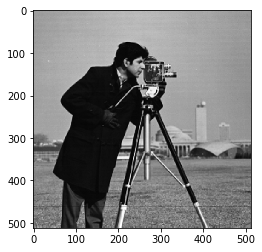

In [2]:
from skimage import data
camera = data.camera()
plt.imshow(camera, cmap='gray')

In [3]:
from skimage import exposure
exposure.histogram??
hist, bin_centers = exposure.histogram(camera)

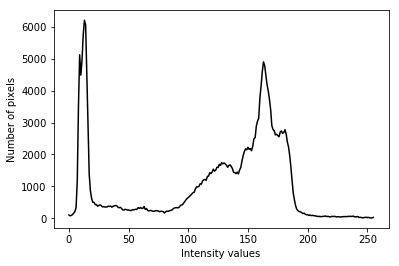

In [4]:
plt.plot(bin_centers, hist, 'k')
plt.xlabel('Intensity values')
plt.ylabel('Number of pixels')

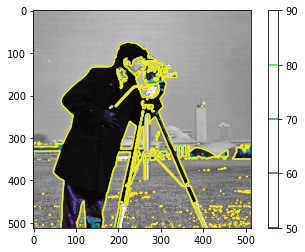

In [5]:
plt.imshow(camera, cmap='gray')
cs = plt.contour(camera, [50, 60, 70, 80, 90])
plt.colorbar(cs)

<div class="alert alert-success">
    <b>EXERCISE</b> write a function ``plot_histogram_rgb`` to plot the histogram of the three RGB channels of an image, and execute it for the cat picture.
</div>

![cat histo](cat_histo.png)

In [6]:
# Your solution goes here
# def plot_histogram_rgb(image):
#     ...

from skimage import exposure

def plot_histogram_rgb(image, ax=None):
    ax = ax if ax is not None else plt.gca()
    for i, color in enumerate('rgb'):
        hist, bin_centers = exposure.histogram(image[..., i])
        ax.fill_between(bin_centers, hist, alpha=0.3, color=color)
        ax.plot(bin_centers, hist, color=color, lw=2)
        ax.set_xlabel('intensity')
        ax.set_ylabel('# pixels')


## Image binarization from histogram thresholding

Image binarization is a common task in image processing, for example to separate foreground from background. This can be done by attributing the background (0) or foreground (1) label to each pixel according to its intensity value, given a threshold.

Image thresholding can be done either with a user-tuned value, or automatically using a thresholding algorithm. The most common thresholding algorithm is Otsu's algorithm.

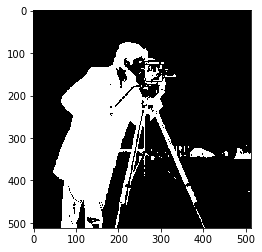

In [7]:
binary_camera = camera < 60
plt.imshow(binary_camera, cmap='gray')

87


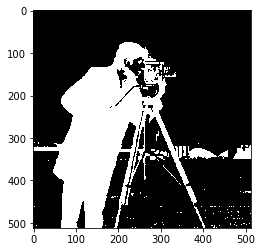

In [8]:
from skimage import filters
value = filters.threshold_otsu(camera)
print(value)
mask = camera < value
plt.imshow(mask, cmap='gray')

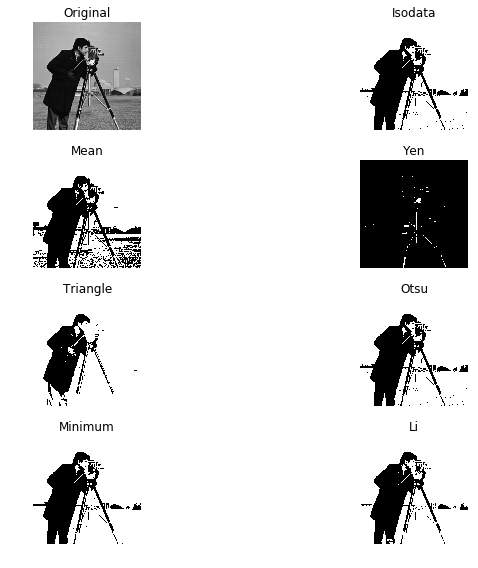

In [9]:
out = filters.try_all_threshold(camera, figsize=(12, 8), verbose=False)


<div class="alert alert-success">
    <b>EXERCISE</b>: compare global and local thresholding
</div>

The coins (``skimage.data.coins``) image has non-uniform illumination, making thresholding more difficult. Compare global (with Otsu as above) and local (with ``filters.threshold_local``) thresholding.

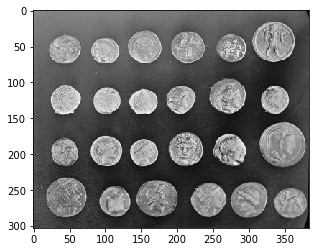

In [10]:
coins = data.coins()
plt.imshow(coins, cmap='gray')

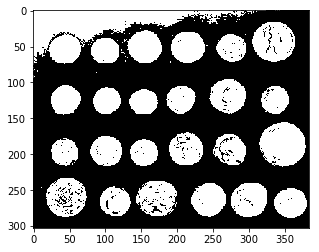

In [11]:
binary_coins_otsu = coins > filters.threshold_otsu(coins)
plt.imshow(binary_coins_otsu, cmap='gray')

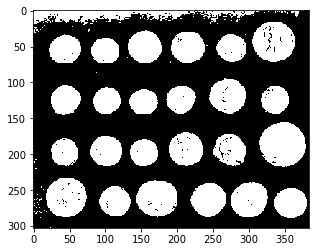

In [12]:
threshold_mask = filters.threshold_local(coins, block_size=301)
plt.imshow(coins > threshold_mask, cmap='gray')

## Modifying the distribution of intensity values

Functions are available for global or local exposure modifications.

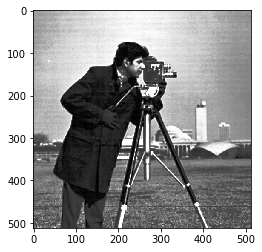

In [13]:
equalize = exposure.equalize_hist(camera)
plt.imshow(equalize, cmap='gray')

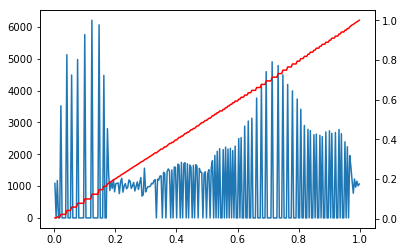

In [14]:
hist, centers = exposure.histogram(equalize)
cum_hist, centers = exposure.cumulative_distribution(equalize)
plt.plot(centers, hist)
plt.twinx()
plt.plot(centers, cum_hist, color='r')

## color images

Can we apply what we have seen for grayscale images to color images? 

We can threshold each of the color channels separately. Or, if we're interested in thresholding according to light intensity, it can be better to switch to the Lab colorspace, and use the light intensity (L) channel.

In [15]:
from skimage import exposure

def plot_histogram_rgb(image, ax=None):
    ax = ax if ax is not None else plt.gca()
    for i, color in enumerate('rgb'):
        hist, bin_centers = exposure.histogram(image[..., i])
        ax.fill_between(bin_centers, hist, alpha=0.3, color=color)
        ax.plot(bin_centers, hist, color=color, lw=2)
        ax.set_xlabel('intensity')
        ax.set_ylabel('# pixels')


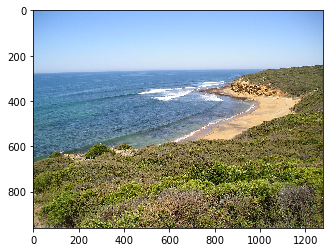

In [16]:
from skimage import data, io
beach = io.imread('Bells-Beach.jpg')
plt.imshow(beach)

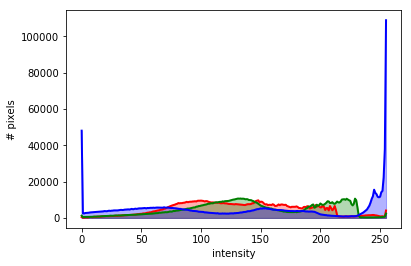

In [17]:
plot_histogram_rgb(beach)

In [18]:
from skimage import color
beach_lab = color.rgb2lab(beach)

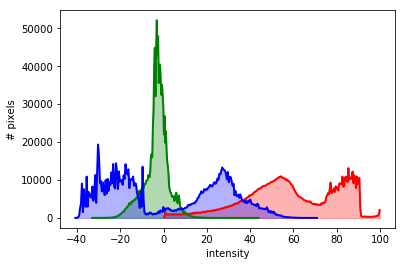

In [19]:
plot_histogram_rgb(beach_lab)

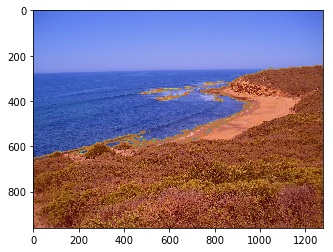

In [20]:
plt.imshow(beach)
plt.contourf(beach_lab[..., 2] > 0, alpha=0.3, cmap='jet')

Going further: here we have used only the light intensity information about the image. To use all the channels, including color information, one can use [clustering methods](https://github.com/scikit-image/skimage-tutorials/blob/master/lectures/machine_learning_solutions.ipynb).